<a href="https://colab.research.google.com/github/vijays4404/TimeSeries/blob/main/salaryprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#importing library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import seaborn as sns

In [27]:
#loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv')
#showing the dataset
df

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Dylan,Windler,CLE,2239200.0,SF,25,50,0,459,37,...,0.833,21,68,89,34,14,3,16,47,110
285,Christian,Wood,HOU,13666667.0,C,26,68,67,2094,440,...,0.623,110,576,686,155,54,65,126,171,1218
286,Delon,Wright,ATL,8526316.0,SG,29,77,8,1452,122,...,0.857,50,170,220,188,93,19,45,56,342
287,Omer,Yurtseven,MIA,1489065.0,C,23,56,12,706,130,...,0.623,85,209,294,49,17,20,41,84,299


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  289 non-null    object 
 1   last_name   289 non-null    object 
 2   team        289 non-null    object 
 3   salary      289 non-null    float64
 4   pos         289 non-null    object 
 5   age         289 non-null    int64  
 6   g           289 non-null    int64  
 7   gs          289 non-null    int64  
 8   mp          289 non-null    int64  
 9   fg          289 non-null    int64  
 10  fga         289 non-null    int64  
 11  fg%         289 non-null    float64
 12  3p          289 non-null    int64  
 13  3pa         289 non-null    int64  
 14  3p%         289 non-null    float64
 15  2p          289 non-null    int64  
 16  2pa         289 non-null    int64  
 17  2p%         289 non-null    float64
 18  efg%        289 non-null    float64
 19  ft          289 non-null    i

In [29]:
#checking for missing data
df.isna().sum()

first_name    0
last_name     0
team          0
salary        0
pos           0
age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg%           0
3p            0
3pa           0
3p%           0
2p            0
2pa           0
2p%           0
efg%          0
ft            0
fta           0
ft%           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
dtype: int64

In [30]:
df_numeric=df.copy()

In [31]:
del df_numeric['first_name']
del df_numeric['last_name']
del df_numeric['team']
del df_numeric['pos']


In [32]:
df_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


Convert Currency to **Float**

In [33]:
def clean_currency(x):
  if isinstance(x,str):
    return (x.replace("$",'').replace(',',''))
  return (x)

In [34]:
df_numeric['salary']=df_numeric['salary'].apply(clean_currency).astype('float')

In [35]:
df_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


In [36]:
df['team'].unique()

array(['TOR', 'MIA', 'BRK', 'MIL', 'CLE', 'NOP', 'MEM', 'LAL', 'ORL',
       'WAS', 'PHO', 'CHO', 'CHI', 'SAC', 'PHI', 'SAS', 'OKC', 'MIN',
       'IND', 'GSW', 'POR', 'LAC', 'BOS', 'DAL', 'NYK', 'UTA', 'DEN',
       'ATL', 'HOU', 'DET'], dtype=object)

In [37]:
print(np.shape(df_numeric))

(289, 27)


In [38]:
print(df_numeric.describe())

             salary         age           g          gs           mp  \
count  2.890000e+02  289.000000  289.000000  289.000000   289.000000   
mean   8.972877e+06   25.768166   56.619377   30.415225  1373.657439   
std    1.008679e+07    4.378557   18.081042   26.947104   698.833132   
min    5.318000e+03   19.000000    9.000000    0.000000    35.000000   
25%    2.033160e+06   22.000000   47.000000    5.000000   799.000000   
50%    4.259259e+06   25.000000   62.000000   21.000000  1406.000000   
75%    1.242000e+07   29.000000   70.000000   57.000000  1931.000000   
max    4.578097e+07   38.000000   82.000000   80.000000  2743.000000   

               fg          fga         fg%          3p         3pa  ...  \
count  289.000000   289.000000  289.000000  289.000000  289.000000  ...   
mean   237.546713   514.283737    0.458730   74.276817  208.335640  ...   
std    164.543135   347.674340    0.072096   63.139612  166.382283  ...   
min      3.000000    13.000000    0.231000    0.000

Box Plots

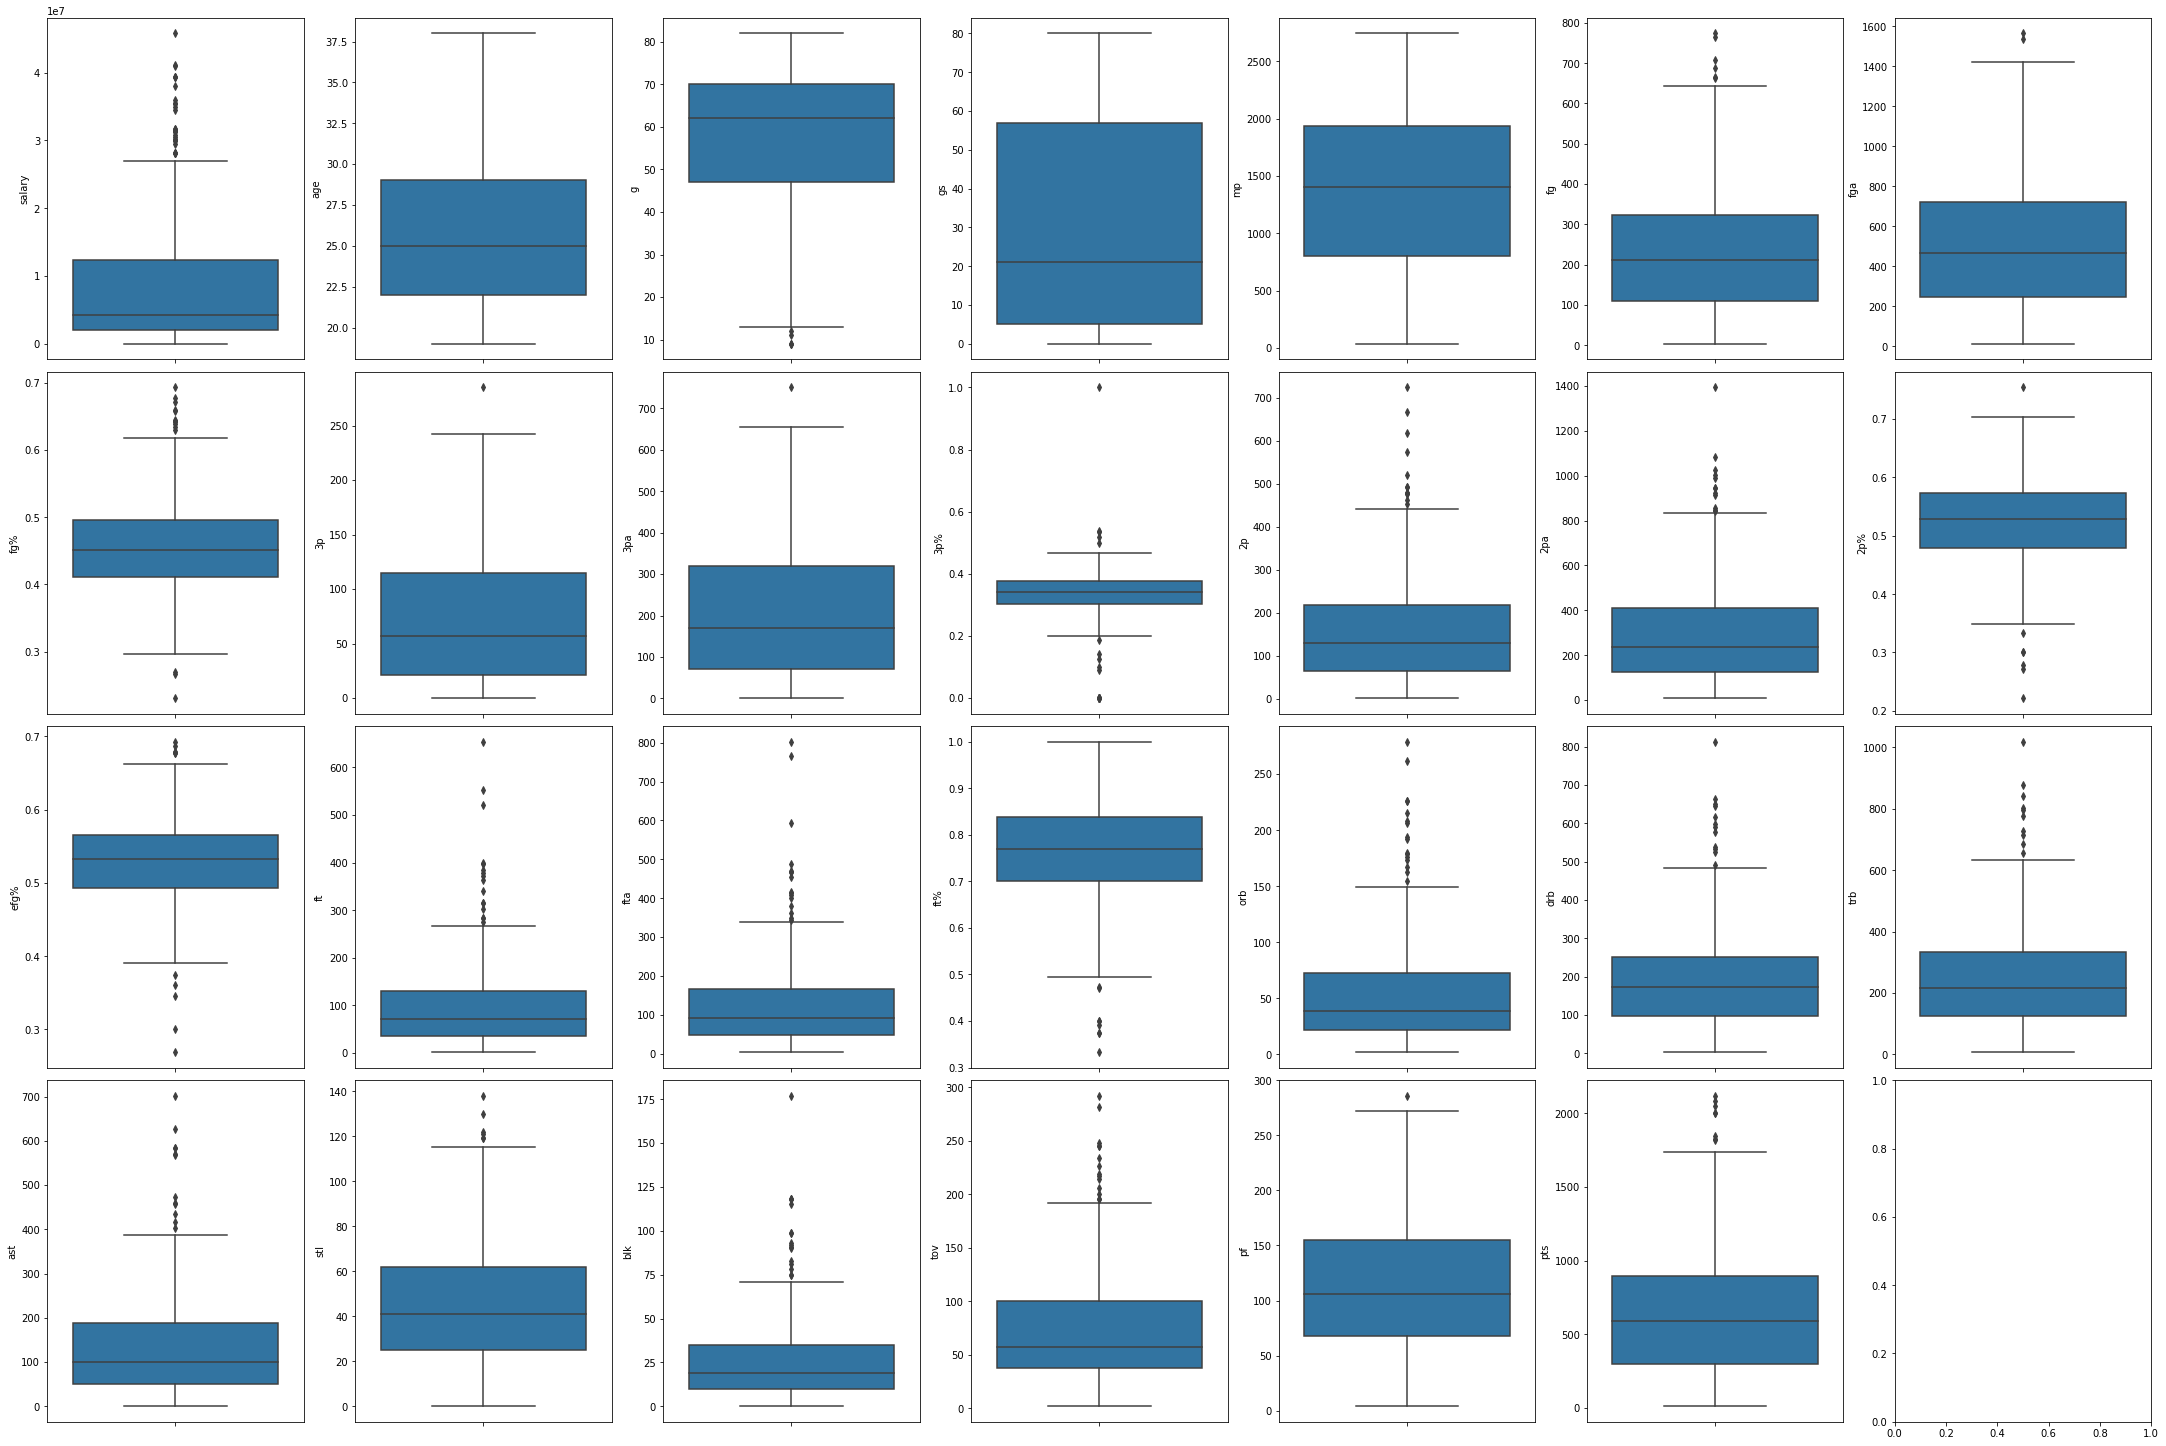

In [44]:
fig,axs=plt.subplots(ncols=7,nrows=4,figsize=(30,20))
index=0
axs=axs.flatten()
for k,v in df_numeric.items():
  sns.boxplot(y=k,data=df_numeric,ax=axs[index])
  index+=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=0.5)

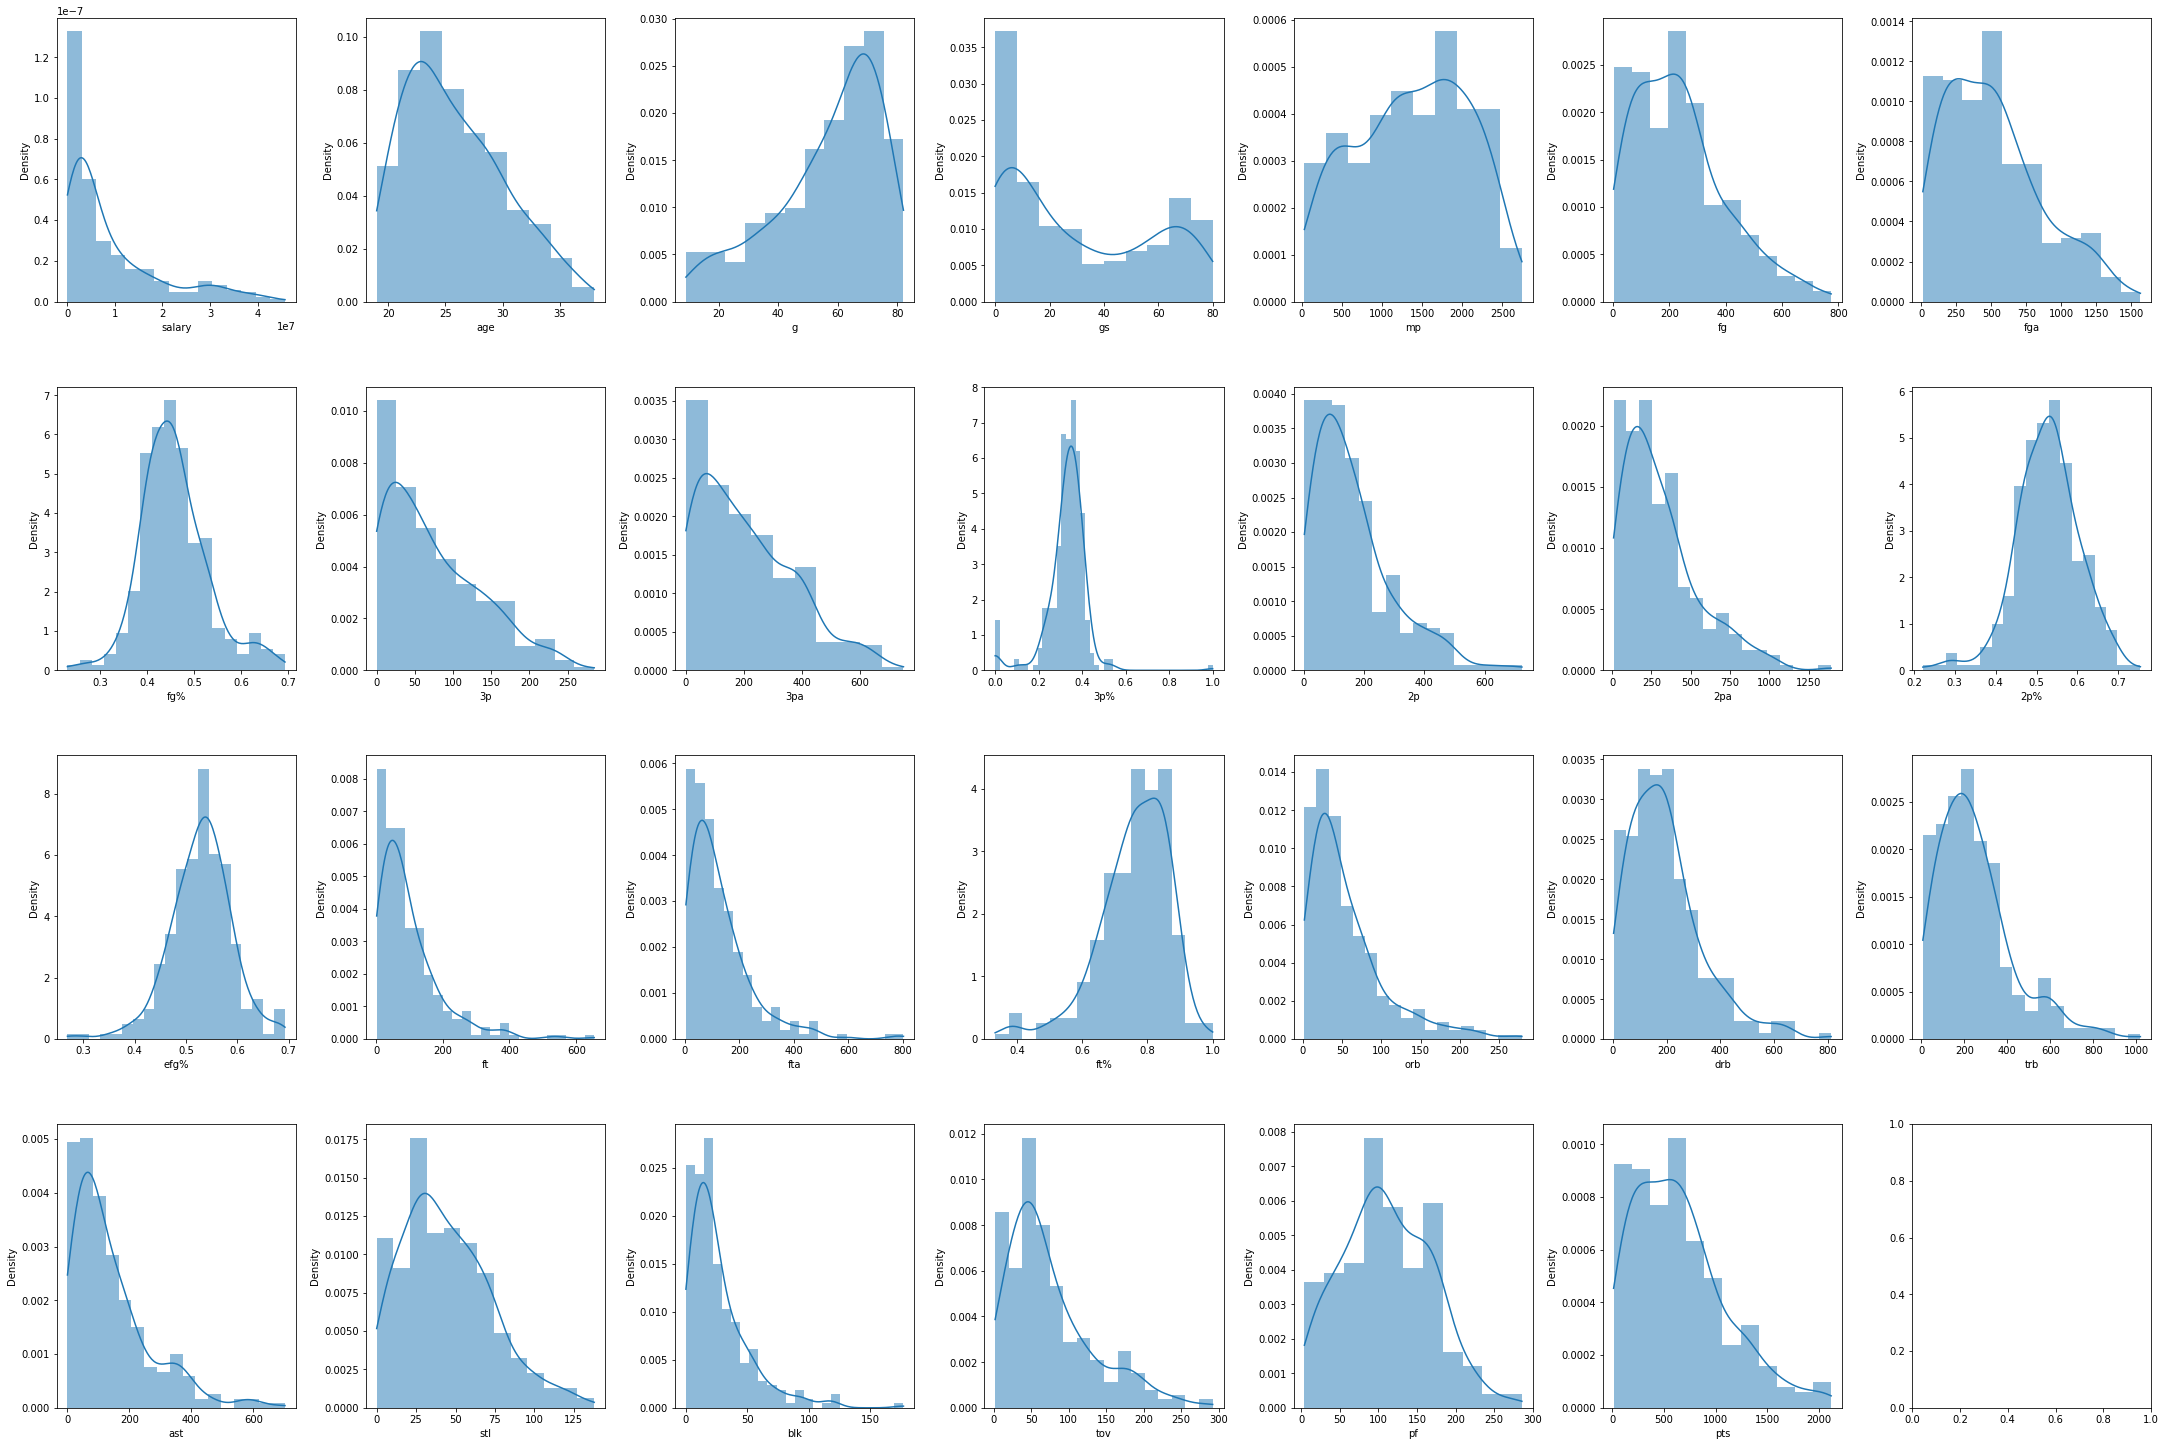

In [48]:
fig,axs=plt.subplots(ncols=7,nrows=4,figsize=(30,20))
index=0
axs=axs.flatten()
for k,v in df_numeric.items():
  sns.histplot(v,ax=axs[index],kde=True,stat="density",linewidth=0)
  index+=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

Correlation **Matrix**

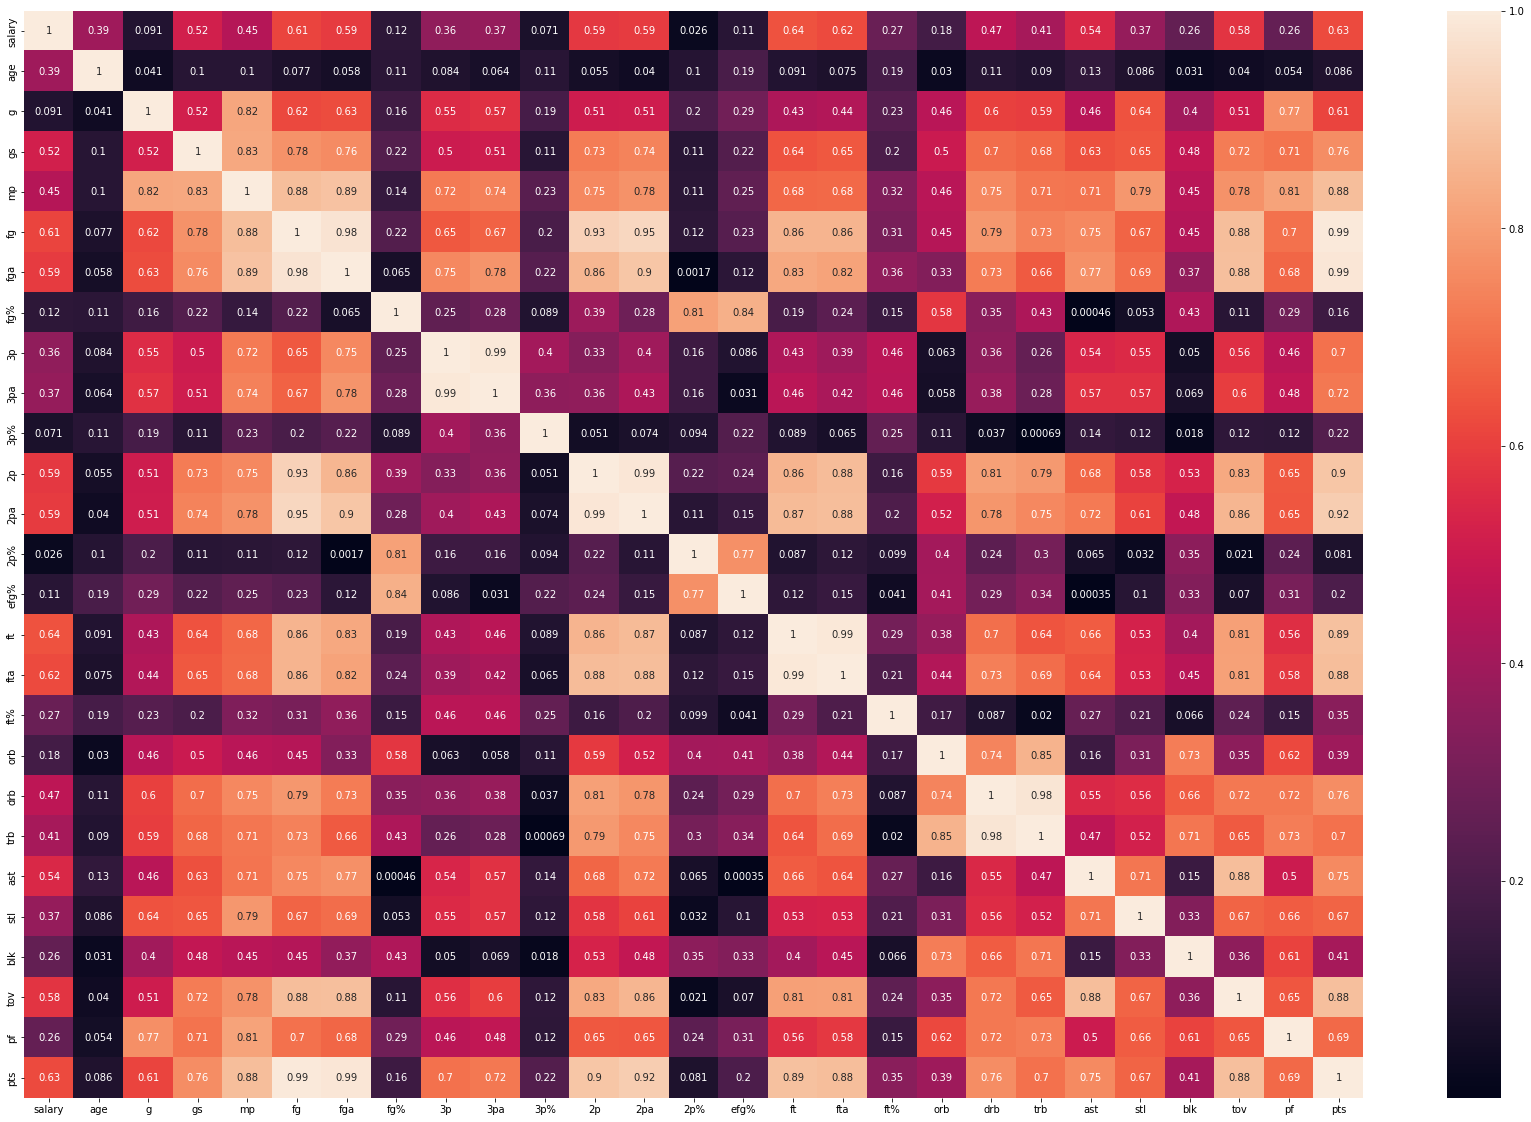

In [50]:
plt.figure(figsize=(30,20))
sns.heatmap(df_numeric.corr().abs(),annot=True)
plt.show()

In [58]:
for k,v in df_numeric.items():
  q1=v.quantile(0.25)
  q3=v.quantile(0.75)
  iqr=q3-q1
  v_col= v[(v<=q1-1.5*iqr)|(v>= q3+1.5*iqr)]
  perc=np.shape(v_col)[0]*100.0/np.shape(df_numeric)[0]
  print("%s Outliers* %.2f%%" % (k,perc))

salary Outliers* 9.69%
age Outliers* 0.00%
g Outliers* 1.73%
gs Outliers* 0.00%
mp Outliers* 0.00%
fg Outliers* 2.08%
fga Outliers* 0.69%
fg% Outliers* 4.84%
3p Outliers* 0.35%
3pa Outliers* 0.35%
3p% Outliers* 6.57%
2p Outliers* 4.50%
2pa Outliers* 4.15%
2p% Outliers* 2.42%
efg% Outliers* 3.81%
ft Outliers* 5.54%
fta Outliers* 5.54%
ft% Outliers* 2.77%
orb Outliers* 5.54%
drb Outliers* 4.15%
trb Outliers* 3.46%
ast Outliers* 4.15%
stl Outliers* 2.08%
blk Outliers* 5.54%
tov Outliers* 4.84%
pf Outliers* 0.35%
pts Outliers* 2.77%


In [55]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   salary  289 non-null    float64
 1   age     289 non-null    int64  
 2   g       289 non-null    int64  
 3   gs      289 non-null    int64  
 4   mp      289 non-null    int64  
 5   fg      289 non-null    int64  
 6   fga     289 non-null    int64  
 7   fg%     289 non-null    float64
 8   3p      289 non-null    int64  
 9   3pa     289 non-null    int64  
 10  3p%     289 non-null    float64
 11  2p      289 non-null    int64  
 12  2pa     289 non-null    int64  
 13  2p%     289 non-null    float64
 14  efg%    289 non-null    float64
 15  ft      289 non-null    int64  
 16  fta     289 non-null    int64  
 17  ft%     289 non-null    float64
 18  orb     289 non-null    int64  
 19  drb     289 non-null    int64  
 20  trb     289 non-null    int64  
 21  ast     289 non-null    int64  
 22  st

In [60]:
#Creating Constant Tensor
scaler=tf.constant(5)
scaler

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [61]:
#Creating a Vector
vector=tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [63]:
#Creating a Matrix
matrix=tf.constant([[1,2],[3,4]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [65]:
#Creating a Tensor
v_tensor=tf.Variable([5,6])
v_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([5, 6], dtype=int32)>

Get & Change **Values**

In [66]:
print("Index 0:",v_tensor[0])
v_tensor[0].assign(8)

Index 0: tf.Tensor(5, shape=(), dtype=int32)


<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([8, 6], dtype=int32)>

Random **Tensors**

In [70]:
rand_tensor=tf.random.Generator.from_seed(66)
rand_tensor


In [76]:
np_array=np.arange(1,25,dtype=np.int32)
np_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [77]:
tensor2=tf.constant(np_array)
tensor2

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [79]:
tensor3=tf.constant(np_array,shape=(6,2,2))
tensor3

<tf.Tensor: shape=(6, 2, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20]],

       [[21, 22],
        [23, 24]]], dtype=int32)>

In [83]:
print("index 0:",tensor3[:1])

print('Dimensioins:',tensor3.ndim)
print('Total Values',tf.size(tensor3).numpy())
print('Data type',tensor3.dtype)

index 0: tf.Tensor(
[[[1 2]
  [3 4]]], shape=(1, 2, 2), dtype=int32)
Dimensioins: 3
Total Values 24
Data type <dtype: 'int32'>


In [85]:
print('Values in Dims:',tensor3.shape)

Values in Dims: (6, 2, 2)


In [89]:
ic_sales=tf.constant([[26,27,22,10,12,33],
             [18,21,10,8,4,26],
             [9,20,4,9,7,16],
             [24,19,12,8,6,14]])

In [90]:
ic_price=tf.constant([[3,2,4,4]])
ic_price

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[3, 2, 4, 4]], dtype=int32)>

In [91]:
tf.matmul(ic_price,ic_sales)


<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[246, 279, 150, 114,  96, 271]], dtype=int32)>

In [92]:
ct=make_column_transformer(
    (MinMaxScaler(),['age','pts']),
    (OneHotEncoder(handle_unknown='ignore'),
     ['pos','team'])
     
)


In [93]:
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'pts']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['pos', 'team'])])

Separate Features & **Labels**

In [94]:
x=df.drop('salary',axis=1) # Features(nba Stats)
y=df['salary'] #Label (Player Salary)


,first_name,last_name,team,pos,age,g,gs,mp,fg,fga,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,C,22,73,28,1725,265,603,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,C,24,56,56,1825,406,729,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,C,36,47,12,1050,252,458,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,SG,26,66,61,1805,255,569,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,C,23,56,56,1809,369,545,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Dylan,Windler,CLE,SF,25,50,0,459,37,98,...,0.833,21,68,89,34,14,3,16,47,110
285,Christian,Wood,HOU,C,26,68,67,2094,440,878,...,0.623,110,576,686,155,54,65,126,171,1218
286,Delon,Wright,ATL,SG,29,77,8,1452,122,269,...,0.857,50,170,220,188,93,19,45,56,342
287,Omer,Yurtseven,MIA,C,23,56,12,706,130,247,...,0.623,85,209,294,49,17,20,41,84,299


In [97]:
#train 80% & test 20%
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [98]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(202, 30)
(87, 30)
(202,)
(87,)


In [110]:
x_train

,first_name,last_name,team,pos,age,g,gs,mp,fg,fga,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
107,Gary,Harris,ORL,SG,27,61,30,1730,240,553,...,0.874,36,86,122,108,59,9,61,112,679
242,Dennis,Smith,POR,PG,24,37,4,638,79,189,...,0.656,20,68,88,132,45,12,51,52,206
245,Max,Strus,MIA,SF,25,68,16,1587,249,564,...,0.792,24,178,202,92,28,16,57,116,721
79,Derrick,Favors,OKC,C,30,39,18,653,94,182,...,0.640,58,126,184,25,17,12,9,62,206
273,Moritz,Wagner,ORL,C,24,63,3,960,197,396,...,0.806,42,190,232,87,20,13,56,123,564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Kelly,Olynyk,DET,C,30,40,1,764,128,286,...,0.775,54,123,177,111,31,19,58,100,365
255,JT,Thor,CHO,PF,19,33,0,262,24,55,...,0.600,11,32,43,19,8,11,10,26,67
72,PJ,Dozier,ORL,SG,25,18,0,340,36,99,...,0.769,14,49,63,29,11,6,13,33,97
235,Collin,Sexton,CLE,SG,23,11,11,316,68,151,...,0.744,13,23,36,23,10,0,31,25,176


Transform Training & Test Data

In [101]:
ct.fit(x_train)
x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

In [102]:
x_train_normal

<202x37 sparse matrix of type '<class 'numpy.float64'>'
	with 804 stored elements in Compressed Sparse Row format>

In [103]:
x_test_normal

<87x37 sparse matrix of type '<class 'numpy.float64'>'
	with 344 stored elements in Compressed Sparse Row format>

In [111]:
tf.random.set_seed(66)
nba_model=tf.keras.Sequential([
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dense(1)
                          ])
nba_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))